# Project: Wrangling and Analyze Data¶


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [303]:
import pandas as pd
import os
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tweepy
import json
import random
import re
re.compile('<title>(.*)</title>')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)
import seaborn as sns

%matplotlib inline


In [304]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [305]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request = requests.get(url)
request

<Response [200]>

In [306]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
with open(os.path.join(folder_name,
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(request.content)


In [307]:
image_predictions = pd.read_csv('{}\image-predictions.tsv'.format(folder_name), sep = '\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        print(json.dumps(json_data, indent=2))

In [308]:
tweet_data_list = []

with open ('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_data_list.append({'tweet_id': json_data['id'],
                             'likes_count': json_data['favorite_count'],
                              'retweet_count': json_data['retweet_count']
                             })
additional_archive = pd.DataFrame(tweet_data_list, columns = ['tweet_id', 'likes_count', 'retweet_count'])       
additional_archive

,tweet_id,likes_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [309]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
892,759447681597108224,NaN,NaN,2016-07-30 17:56:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oakley. He has no idea what happened here. Even offered to help clean it up. 11/10 such a heckin good boy https://t.co/vT3JM8b989,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759447681597108224/photo/1,11,10,Oakley,None,None,None,None
1010,747461612269887489,NaN,NaN,2016-06-27 16:08:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen a shark hold another shark like this before. Must be evolving. Both 10/10 please only send dogs though https://t.co/x4IUNKV79Y,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747461612269887489/photo/1,10,10,None,None,None,None,None
727,782305867769217024,NaN,NaN,2016-10-01 19:47:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sampson. He just graduated. Ready to be a doggo now. Time for the real world. 12/10 have fun with taxes https://t.co/pgVKxRw0s1,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1",12,10,Sampson,doggo,None,None,None
1986,672884426393653248,NaN,NaN,2015-12-04 21:05:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Marvelous dog here. Rad ears. Not very soft. Large tumor on nose. Has a pet rock. Good w kids. 6/10 overall neat pup https://t.co/g5YkRqP0dg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672884426393653248/photo/1,6,10,None,None,None,None,None
386,826615380357632002,NaN,NaN,2017-02-01 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Please only send in dogs. We only rate dogs, not seemingly heartbroken ewoks. Thank you... still 10/10 would console https:/…",8.099208e+17,4.196984e+09,2016-12-17 00:38:52 +0000,https://twitter.com/dog_rates/status/809920764300447744/photo/1,10,10,None,None,None,None,None
1743,679405845277462528,NaN,NaN,2015-12-22 20:59:10 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Crazy unseen footage from Jurassic Park. 10/10 for both dinosaur puppers https://t.co/L8wt2IpwxO,NaN,NaN,NaN,https://vine.co/v/iKVFEigMLxP,10,10,None,None,None,None,None
86,875747767867523072,NaN,NaN,2017-06-16 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Goose. He's a womanizer. Cheeky as h*ck, but also deep. Tongue slip game on another level. 13/10 will steal your girl https://t.co/V2WlACRJCN",NaN,NaN,NaN,https://twitter.com/dog_rates/status/875747767867523072/photo/1,13,10,Goose,None,None,None,None
1161,723912936180330496,NaN,NaN,2016-04-23 16:34:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sugar. She's a Bolivian Superfloof. Spherical af. 12/10 would never let go of https://t.co/AhMfUu6Onm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723912936180330496/photo/1,12,10,Sugar,None,None,None,None
325,833863086058651648,NaN,NaN,2017-02-21 02:17:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bentley. Hairbrushes are his favorite thing in the h*ckin world. 12/10 impawsible to say no to https://t.co/HDloTYilWZ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/833863086058651648/photo/1,https://twitter.com/dog_rates/status/833863086058651648/photo/1",12,10,Bentley,None,None,None,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofol

In [310]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [311]:
twitter_archive.query('rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [312]:
(twitter_archive.rating_denominator != 10).sum()

23

In [313]:
twitter_archive.query('rating_denominator > 10')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a hr

In [314]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [315]:
twitter_archive['name'].value_counts()[:55]


None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Reginald      4
Maggie        4
Luna          4
Maddie        4
Dexter        4
Name: name, dtype: int64

In [316]:
twitter_archive.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

In [317]:
twitter_archive.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [318]:


#in_reply_to_user_id, in_reply_to_status_id :  78 nonnull rows

#retweeted_status_user_id, retweeted_status_timestamp : 181 nonnull rows


In [319]:
#So, retweets have unique tweet id.
twitter_archive.duplicated().sum()

0

In [320]:
#Look up if more than one development stage has been entered for the dog.
def check_multiple_categories(df):
    category_check_list = []
    for index, row in twitter_archive.iterrows():
        count = 0

        if row['doggo'] == 'doggo':
            count += 1
        if row['floofer'] == 'floofer':
            count += 1
        if row['pupper'] == 'pupper':
            count += 1
        if row['puppo'] == 'puppo':
            count += 1
        if count > 1:
            category_check_list.append(index)

    return category_check_list
check_multiple_categories(twitter_archive)

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]

In [321]:
twitter_archive.iloc[191:200]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
192,855818117272018944,NaN,NaN,2017-04-22 16:18:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUST WANTS TO SAY HI AND MAYBE A NOGGIN PAT SHOW SOME RESPECT 13/10 https://t.co/5BEjzT2Tth,NaN,NaN,NaN,https://twitter.com/markhalperin/status/855656431005061120,13,10,None,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
194,855245323840757760,NaN,NaN,2017-04-21 02:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug…,8.421635e+17,4.196984e+09,2017-03-16 00:00:07 +0000,"https://twitter.com/dog_rates/status/842163532590374912/photo/1,https://twitter.com/dog_rates/status/842163532590374912/photo/1",12,10,George,None,None,None,None
195,855138241867124737,NaN,NaN,2017-04-20 19:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @frasercampbell_: oh my... what's that... beautiful scarf around your neck... 14/10 a h*ckin good dog in a h*ckin good game @GoodDogsGam…,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855122533267460096/photo/1,14,10,None,None,None,None,None
196,854732716440526848,NaN,NaN,2017-04-19 16:25:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marlee. She fetched a flower and immediately requested that it be placed behind her ear. 12/10 elegant af https://t.co/nJztIEON5s,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854732716440526848/photo/1,https://twitter.com/dog_rates/status/854732716440526848/photo/1,https://twitter.com/dog_rates/status/854732716440526848/photo/1,https://twitter.com/dog_rates/status/854732716440526848/photo/1",12,10,Marlee,None,None,None,None
197,854482394044301312,NaN,NaN,2017-04-18 23:50:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Arya. She can barely contain her excitement for more peanut butter. Also patriotic af. 13/10 https://t.co/AL4Ahm1Rm5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854482394044301312/photo/1,13,10,Arya,None,None,None,None
198,854365224396361728,NaN,NaN,2017-04-18 16:05:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Einstein. He's having a really good day. Hopes you are too. H*ckin nifty tongue. 13/10 would snug intensely https://t.co/mdaQhhfpv6,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854365224396361728/photo/1,https://twitter.com/dog_rates/status/854365224396361728/photo/1",13,10,Einstein,None,None,None,None
199,854120357044912130,NaN,NaN,2017-04-17 23:52:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"

In [322]:
#check if column doggo contains 'doggo' as value only. Is does.
twitter_archive.doggo.value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [323]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [324]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [325]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

## Image_prediction table

In [326]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
995,708149363256774660,https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg,1,Cardigan,0.350993,True,basset,0.164555,True,toy_terrier,0.080484,True
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
1853,840696689258311684,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,1,web_site,0.841768,False,rule,0.007087,False,envelope,0.006820,False
116,668113020489474048,https://pbs.twimg.com/media/CUWdPsqWcAERQVv.jpg,1,Pembroke,0.548896,True,Cardigan,0.191101,True,collie,0.059814,True
1244,747461612269887489,https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg,1,binoculars,0.192717,False,barbershop,0.085838,False,ballplayer,0.084672,False
1320,756288534030475264,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False
1143,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg,1,hand_blower,0.296145,False,chain_mail,0.262271,False,toilet_seat,0.149497,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
1120,726828223124897792,https://pbs.twimg.com/media/ChY2aHyWMAAbNQE.jpg,1,miniature_pinscher,0.255327,True,Border_terrier,0.181279,True,Labrador_retriever,0.125185,True
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True


In [327]:
image_predictions.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Additional_archive table

In [328]:
additional_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2354 non-null   int64
 1   likes_count    2354 non-null   int64
 2   retweet_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [329]:
additional_archive.describe()

,tweet_id,likes_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [330]:
additional_archive.sample(6)

,tweet_id,likes_count,retweet_count
1184,718540630683709445,2730,1137
1870,675146535592706048,1300,349
608,797545162159308800,16198,5656
1118,731156023742988288,4196,1434
1338,704859558691414016,2462,612
215,850753642995093505,33348,10352


In [331]:
additional_archive.tweet_id.nunique()

2354

In [332]:
additional_archive[additional_archive.likes_count.isnull()].shape

(0, 3)

In [333]:
additional_archive[additional_archive.retweet_count.isnull()].shape

(0, 3)

In [334]:
additional_archive.query('retweet_count == "None"')

,tweet_id,likes_count,retweet_count


### Tidiness issues

   Twitter_archive Table
1. There must be one column for dogs' growth stages. puppo or doggo are not variables, are values.

  All tables

2. All tables could be merge into one. One table is enough while yet standing as one etity.

### Quality issues



1. all "id" columns are nonobject type. timestamp column datatype is wrong.
2. retweet data is also among tweet data.
3. More than four columns about replies and retweets with more than 90% NaN values.
4. None values instead of NaN, in columns 'name' and stages.
5. More than one growth stage has been entered for some rows.
6. wrong or invalid name for dogs.
7. Invalid denominator values
8. Wierd numerators
9. .info() says there are not enough urls for tweet ids.
10. Breed names are not consistent. First letters are not capital. There are underscores. (it seems to be copyied from a table of dog breeds.)
11. Put descriptive titles for image_prediction table variables.



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [335]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
additional_archive_clean = additional_archive.copy()

### Issue #1: Quality 

#### Define 
Change the datatypes of 'id' attribute in all tables to the string.
Change the datatype of 'timestamp' column to datetime.

#### Code

In [336]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('object')
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('object')
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('object')
twitter_archive_clean['retweeted_status_id'] = twitter_archive_clean['retweeted_status_id'].astype('object')
twitter_archive_clean['retweeted_status_user_id'] = twitter_archive_clean['retweeted_status_user_id'].astype('object')
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype('float')
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('object')
additional_archive_clean['tweet_id'] = additional_archive_clean['tweet_id'].astype('object')




#### Test

In [337]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [338]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [339]:
additional_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2354 non-null   object
 1   likes_count    2354 non-null   int64 
 2   retweet_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #2: Quality

#### Define 
Since even retweets have uniquie tweet_ids but we want our analysis to be based on original tweets only. We have to delete rows
with non-noll retweet_user_id value.


#### Code

In [340]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     object             
 2   in_reply_to_user_id         78 non-null     object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [341]:

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull() ==True]


twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_user_id'].isnull() ==True]

In [342]:
#### Test

In [343]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      object             
 2   in_reply_to_user_id         0 non-null      object             
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      object             
 7   retweeted_status_user_id    0 non-null      object             
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64         

### Issue #3: Quality

#### Define 
Drop irrelevant columns and columns with all NaN values. 

#### code

In [344]:
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp'], axis=1, inplace = True)
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

#### Test

In [345]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

### Issue #1: Tidiness 


#### Define
Combine all four growth stages ('doggo', 'floofer', 'pupper', 'puppo') in one column called 'growth_stage'

### Issue #4 : Quality


#### Define
Changing None values to NaN

### Issue #5: Quality

#### Define
Considering rows with more than one development stage.
This could be due to the tweet being about two dogs, or talking about different stages of the dog in the picture.
Detect them in the process of combinig, then, change them manually as much as it's possible.

#### Define
Changing None values to NaN

#### Code

In [346]:
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace(np.NaN, '', inplace=True)

In [347]:
twitter_archive_clean['development_stage'] = twitter_archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [348]:
twitter_archive_clean['development_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.development_stage == 'doggopupper', 'development_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.development_stage == 'doggopuppo', 'development_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.development_stage == 'doggofloofer', 'development_stage'] = 'doggo, floofer'


In [349]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [350]:
twitter_archive_clean.development_stage.value_counts()

                  1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: development_stage, dtype: int64

In [351]:
twitter_archive_clean.development_stage.replace('', np.NaN, inplace=True)

In [352]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   float64            
 7   name                2097 non-null   object             
 8   development_stage   336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 163.8+ KB


In [353]:
twitter_archive_clean.query('development_stage == "doggo, floofer" ')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,development_stage
200,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11.0,10.0,None,"doggo, floofer"


In [354]:
#Change the spotted accurate numbers
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 817777686764523521  , ['development_stage']] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 801115127852503040     , ['development_stage']] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 785639753186217984         , ['development_stage']] = 'doggo'


In [355]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 855851453814013952   , ['development_stage']] = 'puppo'

In [356]:
#test
twitter_archive_clean.query('development_stage == "doggo, puppo" ').shape

(0, 9)

In [357]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 854010172552949760  , ['development_stage']] = 'floofer'

In [358]:
twitter_archive_clean.iloc[160:162]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,development_stage
199,854120357044912130,2017-04-17 23:52:16+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend https://t.co/oBL7LEJEzR,"https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1",14.0,10.0,None,pupper
200,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11.0,10.0,None,floofer


### Issue #2: Tidiness

#### Define
All values in three tables are measurements related to tweets. Are drived from tweet_ids.Thus, we merge all the tables together.

#### Code

In [359]:
master_df = twitter_archive_clean.merge(additional_archive_clean, on = 'tweet_id')
master_df = master_df.merge(image_predictions_clean, on = 'tweet_id')

master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1971 non-null   object             
 8   development_stage   303 non-null    object             
 9   likes_count         1971 non-null   int64              
 10  retweet_count       1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

#### Test

In [360]:
master_df.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,development_stage,likes_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
600,768855141948723200,2016-08-25 16:58:45+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jesse. He really wants a belly rub. Will be as cute as possible to achieve that goal. 11/10 https://t.co/1BxxcdVNJ8,https://twitter.com/dog_rates/status/768855141948723200/photo/1,11.0,10.0,Jesse,NaN,4660,1034,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,chow,0.720219,True,Brabancon_griffon,0.058365,True,Rottweiler,0.055113,True


In [361]:
master_df.duplicated().sum()

0

### Issue #6: Quality 



#### Define
Delete wrong names - which mostly start with small letters. Thus, we concluded that small letters should be vanished.
Change values 'None' in name column to NaN values. None is not Nan in pandas as is calculated as a value.

### Issue #4: Quality

#### Code

In [362]:
master_df.name.value_counts()

None          524
a              55
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 935, dtype: int64

In [363]:
master_df[master_df.name.isnull()].shape

(0, 22)

In [364]:
master_df.loc[master_df.name.str.islower(),'name'] = None

master_df.name.replace('None', np.NaN, inplace=True)

#### Test

In [365]:
master_df[master_df.name.isnull()].shape

(622, 22)

### Issue #7: Quality

#### Define

Change rating_denominators to 10. (rating system uses a fraction with denominator of 10.) 
I did this part completely manually since the data was rather small.

#### Code

In [366]:
wrong_den = master_df[master_df['rating_denominator'] != 10]

wrong_den[['tweet_id','text','rating_denominator']]

,tweet_id,text,rating_denominator
320,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70.0
382,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7.0
658,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150.0
794,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11.0
842,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170.0
884,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20.0
918,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0
939,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90.0
963,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0
981,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50.0


In [367]:
master_df.loc[master_df.tweet_id == 820690176645140481, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 820690176645140481, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 758467244762497024, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 740373189193256964, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 731156023742988288, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 722974582966214656, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 716439118184652801, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 713900603437621249, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 710658690886586372, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 709198395643068416, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 704054845121142784, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 697463031882764288, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 684225744407494656, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 684222868335505415, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 682962037429899265, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 677716515794329600, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 675853064436391936, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 666287406224695296, ['rating_denominator']] = 10
master_df.loc[master_df.tweet_id == 810984652412424192, ['rating_denominator']] = 10


    

#### Test

In [368]:
wrong_den = master_df[master_df['rating_denominator'] != 10]
wrong_den.shape

(0, 22)

### Issue #8: Quality

#### Define
Find the accurate numerators from the text  of the tweet (using a for loop or regex) and insert it in the 'rating_numerator'. 
Since there are decimal numbers in the text, we have to change the numerator type into float.

#### Code

In [369]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1349 non-null   object             
 8   development_stage   303 non-null    object             
 9   likes_count         1971 non-null   int64              
 10  retweet_count       1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

In [370]:
master_df['rating_numerator'] = master_df['rating_numerator'].astype('float')

In [371]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1349 non-null   object             
 8   development_stage   303 non-null    object             
 9   likes_count         1971 non-null   int64              
 10  retweet_count       1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

In [372]:
master_df.rating_numerator.value_counts()

12.0      446
10.0      417
11.0      392
13.0      253
9.0       150
8.0        95
7.0        52
14.0       33
5.0        33
6.0        32
3.0        19
4.0        16
2.0         9
1.0         5
27.0        1
45.0        1
88.0        1
144.0       1
26.0        1
121.0       1
44.0        1
60.0        1
80.0        1
75.0        1
99.0        1
50.0        1
204.0       1
1776.0      1
165.0       1
0.0         1
84.0        1
24.0        1
420.0       1
Name: rating_numerator, dtype: int64

In [373]:
#First problem is with decimal numbers. The algorithem had not been considered that people might enter decimal ratings.
#find the correct numerator using regex expression from the text and replace it with the wrong one that exists.



rating = master_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
master_df['rating_numerator'] = rating['rating_numerator'].astype(float)
master_df['rating_denominator'] = rating['rating_denominator'].astype(float)

In [374]:
master_df['rating_numerator'].value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00        95
7.00        52
14.00       33
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
11.27        1
9.75         1
88.00        1
144.00       1
11.26        1
121.00       1
44.00        1
60.00        1
45.00        1
80.00        1
99.00        1
50.00        1
204.00       1
1776.00      1
165.00       1
13.50        1
0.00         1
84.00        1
24.00        1
420.00       1
Name: rating_numerator, dtype: int64

In [375]:
#Second problem is to search for true numerator rating in text that have more than one "/". 
#(I tried to use the code you sent also for this part, but it returned an error so I leave it as my own way. )
#They have misled the algorithem to find the correct value.
df = master_df[master_df.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

df

C:\Users\Sami\AppData\Local\Temp/ipykernel_2548/1617697503.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df = master_df[master_df.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,development_stage,likes_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
551,777684233540206592,2016-09-19 01:42:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12.0,10.0,NaN,NaN,12518,3403,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
745,747600769478692864,2016-06-28 01:21:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10.0,10.0,Bookstore,NaN,2545,619,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
794,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11.0,NaN,NaN,20648,9220,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
884,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20.0,NaN,NaN,4493,1764,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
918,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50.0,Bluebert,NaN,2574,247,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
934,714258258790387713,2016-03-28 01:10:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10.0,10.0,Travis,NaN,3281,808,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1052,703356393781329922,2016-02-26 23:10:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9.0,10.0,Socks,NaN,2085,429,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1141,695064344191721472,2016-02-04 02:00:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">T

In [376]:
# Save the text where the rating numerator was incorrectly extracted
ratings_to_fix = ['These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s', 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 'When bae says they cant go out but you see them  someone  that same night. 5/10 ; 10/10  heartbroken pup',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq','This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10',
 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5','Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y','Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10','After much debate this dog is being upgraded to 10/10. I repeat 10/10',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [377]:
# Loop through the list of ratings to fix and extract the second occurence of #/ to save as the rating numerator. As all the
# occurences of the actual ratings in the ratings to fix list have a denominator of 10, we will set that value for each 
#entry instead of extracting it.
for entry in ratings_to_fix:
    mask = master_df.text == entry
    column_name1 = 'rating_numerator'
   
    master_df.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
  

In [378]:
master_df[master_df.text.isin(ratings_to_fix)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,development_stage,likes_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
794,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,11.0,NaN,NaN,20648,9220,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
884,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,20.0,NaN,NaN,4493,1764,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
918,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,50.0,Bluebert,NaN,2574,247,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1313,682962037429899265,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,11.0,Darrel,NaN,26239,15043,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
1888,667491009379606528,2015-11-19 23:53:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,8,10.0,NaN,NaN,559,242,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False
1950,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,2.0,None,NaN,152,71,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [379]:
#while applying mean function, I noticed that 'rating_numerator' has changed into an 'str'in this section of code. Thus, I am returning it to float.
master_df['rating_numerator'] = master_df['rating_numerator'].astype('float')

### Issue #9: Quality

#### Define
Remove the records with no images information ('expanded_urls' is NaN).eventhough most of them must have been removed when dropping retweets- which have no new images.

#### Code

In [380]:
sum(twitter_archive.expanded_urls.isna() & \
    (twitter_archive.in_reply_to_status_id.notnull() | \
     twitter_archive.retweeted_status_id.notnull()))

56

In [381]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1349 non-null   object             
 8   development_stage   303 non-null    object             
 9   likes_count         1971 non-null   int64              
 10  retweet_count       1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

In [382]:
master_df = master_df[master_df['expanded_urls'].notnull() ==True]

#### Test

In [383]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1349 non-null   object             
 8   development_stage   303 non-null    object             
 9   likes_count         1971 non-null   int64              
 10  retweet_count       1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

### Issue #10: Quality

#### Define
Remove uderscores and capitalize breed names in columns 'p1', 'p2' and 'p3'to have consistent data.

#### Code

In [384]:
master_df.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,development_stage,likes_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1299,683828599284170753,2016-01-04 01:53:37+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Breathtaking pupper here. Should be on the cover of Dogue. Top-notch tongue. Appears considerably fluffy. 12/10 https://t.co/Eeh3yfdglS,https://twitter.com/dog_rates/status/683828599284170753/photo/1,12.0,10.0,NaN,pupper,3053,1195,https://pbs.twimg.com/media/CX1ye7HUMAADDzh.jpg,1,malamute,0.577376,True,Siberian_husky,0.287131,True,Eskimo_dog,0.117563,True


In [385]:
master_df[['p1', 'p2', 'p3']] = master_df[['p1', 'p2', 'p3']].replace("_", " ", regex = True)
master_df['p1'] = master_df['p1'].str.title()
master_df['p2'] = master_df['p2'].str.title()
master_df['p3'] = master_df['p3'].str.title()


#### Test

In [386]:
master_df.p1

0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper Towel
4                       Basset
                 ...          
1966        Miniature Pinscher
1967       Rhodesian Ridgeback
1968           German Shepherd
1969                   Redbone
1970    Welsh Springer Spaniel
Name: p1, Length: 1971, dtype: object

### Issue #11: Quality

#### Define

Define a descriptive name for columns with abbreviations.

#### Code

In [387]:
master_df.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,development_stage,likes_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1421,677700003327029250,2015-12-18 04:00:46+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ralph. He's an interpretive dancer. 10/10 https://t.co/zoDdPyPFsa,https://twitter.com/dog_rates/status/677700003327029250/photo/1,10.0,10.0,Ralph,NaN,3689,1622,https://pbs.twimg.com/media/CWesj06W4AAIKl8.jpg,1,Siberian Husky,0.120849,True,Junco,0.079206,False,Malamute,0.063088,True


In [388]:
master_df.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)



#### Test

In [389]:
master_df.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,development_stage,likes_count,retweet_count,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
1248,686947101016735744,2016-01-12 16:25:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jackson. He was specifically told not to sleep in the fridge. Damn it Jackson. 11/10 would squeeze softly https://t.co/lJs10ZJsgj,https://twitter.com/dog_rates/status/686947101016735744/photo/1,11.00,10.0,Jackson,NaN,9433,3582,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,Refrigerator,0.799795,False,Medicine Chest,0.182538,False,Ice Bear,0.001431,False
164,851224888060895234,2017-04-10 00:06:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Snoop. His number one passion is sticking his head out of car windows, so he purchased some doggles. Stylish af. 13/10 happy travels https://t.co/iHYfZdz444","https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1",13.00,10.0,Snoop,NaN,22090,6350,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,Car Mirror,0.971512,False,Seat Belt,0.007063,False,Standard Poodle,0.005683,True
1162,693095443459342336,2016-01-29 15:36:45+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Milo. He doesn't understand your fancy human gestures. Will lick instead. 10/10 can't faze this pupper https://t.co/OhodPIDOpW,https://twitter.com/dog_rates/status/693095443459342336/photo/1,10.00,10.0,Milo,pupper,2056,523,https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg,1,Ice Lolly,0.660099,False,Neck Brace,0.039563,False,Yorkshire Terrier,0.033488,True
89,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",12.00,10.0,Napolean,doggo,20730,3628,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,Komondor,0.974781,True,Briard,0.020041,True,Swab,0.003228,False
1889,667470559035432960,2015-11-19 22:32:36+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.00,10.0,None,NaN,273,102,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,Toy Poodle,0.304175,True,Pug,0.223427,True,Lakeland Terrier,0.073316,True
1036,704859558691414016,2016-03-02 02:43:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,https://twitter.com/dog_rates/status/704859558691414016/photo/1,10.00,10.0,None,pupper,2462,612,https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg,1,Pug,0.284428,True,Teddy,0.156339,False,Mitten,0.138915,False
626,762699858130116608,2016-08-08 17:19:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Leela. She's a Fetty Woof. Lost eye while saving a baby from an avalanche. 11/10 true h*ckin hero https://t.co/2lBg3ZgivD,https://twitter.com/dog_rates/status/762699858130116608/photo/1,11.00,10.0,Leela,NaN,13518,4190,https://pbs.twimg.com/media/CpWnecZWIAAUFwt.jpg,1,Kelpie,0.519047,True,German Shepherd,0.296069,True

In [390]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1349 non-null   object             
 8   development_stage   303 non-null    object             
 9   likes_count         1971 non-null   int64              
 10  retweet_count       1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. The most common breeds are:Golden Retriever,Labrador Retriever, Pembroke, Chihuahua respectively.(It's interesting for me to know why. to what variables it deponds.)

2. Soft Coated terrier has obviuosly the highest average rating.

3.Dogs were usually in pupper stage.

4. likes or retweet ? Which one should you trust as a measure of popularity?

In [391]:
master_df['rating_numerator'].mean()
#the average numerator is 12.17

12.172389649923895

## 1. What is the most common breed ?

In [392]:
is_dog = master_df.loc[master_df['first_dog'] == True]
is_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 1 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1463 non-null   object             
 1   timestamp           1463 non-null   datetime64[ns, UTC]
 2   source              1463 non-null   object             
 3   text                1463 non-null   object             
 4   expanded_urls       1463 non-null   object             
 5   rating_numerator    1463 non-null   float64            
 6   rating_denominator  1463 non-null   float64            
 7   name                1044 non-null   object             
 8   development_stage   227 non-null    object             
 9   likes_count         1463 non-null   int64              
 10  retweet_count       1463 non-null   int64              
 11  jpg_url             1463 non-null   object             
 12  img_num             1463 non-null 

In [393]:
is_dog['first_prediction'].value_counts()

Golden Retriever                  137
Labrador Retriever                 94
Pembroke                           88
Chihuahua                          78
Pug                                54
Chow                               41
Samoyed                            40
Pomeranian                         38
Toy Poodle                         37
Malamute                           29
Cocker Spaniel                     27
French Bulldog                     26
Chesapeake Bay Retriever           23
Miniature Pinscher                 21
Siberian Husky                     20
German Shepherd                    20
Staffordshire Bullterrier          19
Eskimo Dog                         18
Shetland Sheepdog                  18
Maltese Dog                        18
Shih-Tzu                           17
Cardigan                           17
Beagle                             17
Rottweiler                         16
Italian Greyhound                  16
Lakeland Terrier                   15
Kuvasz      

In [394]:
# Split the breed counts into a top 10 list and all others.
totals = is_dog['first_prediction'].value_counts()
top_10_totals = totals[0:10]
others = totals[10:]
# Also create a bottom 10 list.
bottom_10_totals = totals[-10:]
bottom_10_totals

Toy Terrier                2
Australian Terrier         2
Black-And-Tan Coonhound    2
Silky Terrier              1
Groenendael                1
Scotch Terrier             1
Entlebucher                1
Japanese Spaniel           1
Standard Schnauzer         1
Clumber                    1
Name: first_prediction, dtype: int64

In [395]:
# Combine the other breeds into a single value for plotting.
top_10_totals.at['Other'] = others.sum()
top_10_totals
display(top_10_totals)




Golden Retriever      137
Labrador Retriever     94
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy Poodle             37
Malamute               29
Other                 827
Name: first_prediction, dtype: int64

In [396]:

pd.set_option('display.max_rows', 500)
liste = list(zip(master_df['first_prediction'].value_counts().keys(), master_df['first_prediction'].value_counts()))
df = pd.DataFrame (liste, columns = ['breed', 'counts'])[:377]
display (df)

,breed,counts
0,Golden Retriever,137
1,Labrador Retriever,94
2,Pembroke,88
3,Chihuahua,78
4,Pug,54
5,Chow,41
6,Samoyed,40
7,Pomeranian,38
8,Toy Poodle,37
9,Malamute,29


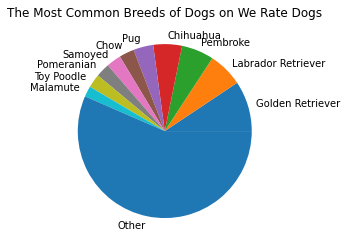

In [397]:
plt.pie(top_10_totals, labels = top_10_totals.index)
plt.title('The Most Common Breeds of Dogs on We Rate Dogs')
plt.savefig('Dog Breed Proportions Pieplot.png', dpi=500, bbox_inches = "tight")
plt.show()

### Which breed hast the highest rating?


In [398]:
breeds = is_dog['first_prediction'].value_counts().keys()
breed_mean_rating = []
breeds

Index(['Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua',
       'Pug', 'Chow', 'Samoyed', 'Pomeranian', 'Toy Poodle', 'Malamute',
       ...
       'Toy Terrier', 'Australian Terrier', 'Black-And-Tan Coonhound',
       'Silky Terrier', 'Groenendael', 'Scotch Terrier', 'Entlebucher',
       'Japanese Spaniel', 'Standard Schnauzer', 'Clumber'],
      dtype='object', length=111)

In [399]:
for breed in breeds:
    avg = is_dog.loc[is_dog['first_prediction'] == breed]['rating_numerator'].mean()
    breed_mean_rating.append([breed, avg])

In [400]:
breed_mean_rating.sort(key=lambda x: x[1], reverse=True)
breed_mean_rating

[['Soft-Coated Wheaten Terrier', 26.7],
 ['West Highland White Terrier', 15.642857142857142],
 ['Great Pyrenees', 14.928571428571429],
 ['Borzoi', 14.75],
 ['Labrador Retriever', 13.936170212765957],
 ['Saluki', 12.5],
 ['Golden Retriever', 12.375912408759124],
 ['Briard', 12.333333333333334],
 ['Tibetan Mastiff', 12.25],
 ['Border Terrier', 12.142857142857142],
 ['Silky Terrier', 12.0],
 ['Standard Schnauzer', 12.0],
 ['Eskimo Dog', 11.777777777777779],
 ['Gordon Setter', 11.75],
 ['Irish Setter', 11.75],
 ['Samoyed', 11.7],
 ['Chow', 11.609756097560975],
 ['Cardigan', 11.529411764705882],
 ['Giant Schnauzer', 11.5],
 ['Wire-Haired Fox Terrier', 11.5],
 ['Australian Terrier', 11.5],
 ['Kelpie', 11.454545454545455],
 ['Pembroke', 11.443181818181818],
 ['Norfolk Terrier', 11.333333333333334],
 ['Leonberg', 11.333333333333334],
 ['Greater Swiss Mountain Dog', 11.333333333333334],
 ['Irish Water Spaniel', 11.333333333333334],
 ['Siberian Husky', 11.3],
 ['Cocker Spaniel', 11.2962962962962

In [401]:
top_10_breeds = breed_mean_rating[0:10]
top_10_breeds

[['Soft-Coated Wheaten Terrier', 26.7],
 ['West Highland White Terrier', 15.642857142857142],
 ['Great Pyrenees', 14.928571428571429],
 ['Borzoi', 14.75],
 ['Labrador Retriever', 13.936170212765957],
 ['Saluki', 12.5],
 ['Golden Retriever', 12.375912408759124],
 ['Briard', 12.333333333333334],
 ['Tibetan Mastiff', 12.25],
 ['Border Terrier', 12.142857142857142]]

In [402]:
bottom_10_breeds = breed_mean_rating[-10:]
bottom_10_breeds

[['Boston Bull', 9.444444444444445],
 ['Dalmatian', 9.333333333333334],
 ['Miniature Schnauzer', 9.25],
 ['Tibetan Terrier', 9.25],
 ['Walker Hound', 9.0],
 ['Norwich Terrier', 9.0],
 ['Welsh Springer Spaniel', 9.0],
 ['Ibizan Hound', 9.0],
 ['Scotch Terrier', 9.0],
 ['Japanese Spaniel', 5.0]]

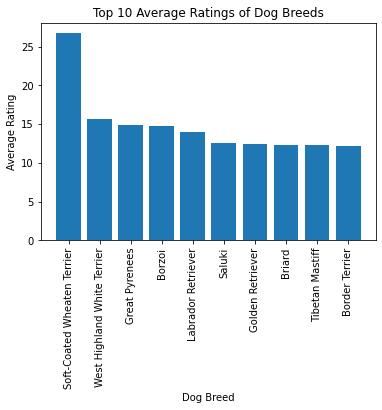

In [403]:
breed_names = list(zip(*top_10_breeds))[0]
breed_ratings = list(zip(*top_10_breeds))[1]
plt.bar(breed_names, breed_ratings)
plt.xticks(rotation=90)
plt.xlabel('Dog Breed')
plt.ylabel('Average Rating')
plt.title('Top 10 Average Ratings of Dog Breeds')
plt.savefig('Top 10 Ratings Barplot.png', dpi=300, bbox_inches = "tight")
plt.show()

### What is the most common stage?

In [404]:
 master_df.development_stage.value_counts()


pupper           202
doggo             65
puppo             23
floofer            8
doggo, pupper      5
Name: development_stage, dtype: int64

In [405]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   float64            
 7   name                1349 non-null   object             
 8   development_stage   303 non-null    object             
 9   likes_count         1971 non-null   int64              
 10  retweet_count       1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

<AxesSubplot:xlabel='retweet_count', ylabel='likes_count'>

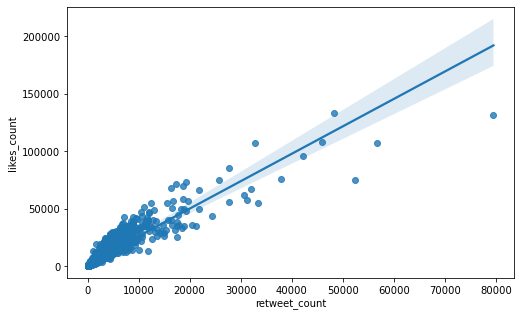

In [406]:
plt.figure(figsize=(8,5))
sns.regplot(x="retweet_count", y="likes_count", data=master_df)

(0.0, 8000.0)

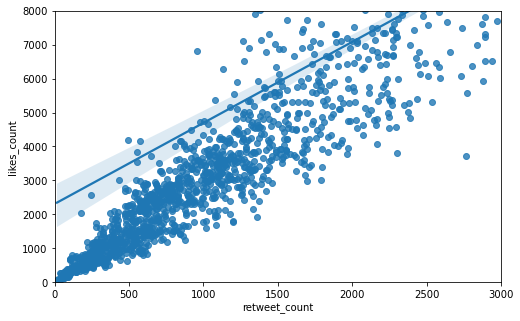

In [407]:
#zoom in
plt.figure(figsize=(8,5))
sns.regplot(x="retweet_count", y="likes_count", data=master_df)
plt.xlim(0,3000)
plt.ylim(0,8000)

<AxesSubplot:xlabel='likes_count', ylabel='retweet_count'>

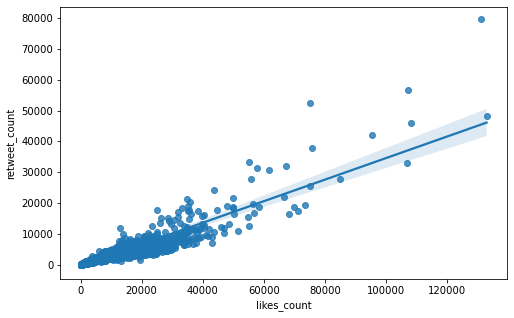

In [408]:
plt.figure(figsize=(8,5))
sns.regplot(x="likes_count", y="retweet_count", data=master_df)


### The two plots show that there is an obvious linear relationship between  the number of likes and retweets of a tweet.
This means, by increaseing in likes there will be an increase in retweets and vice versa. However, more detailed analysis could be carried out to be sure that these two variables are interchangable in all cases and if there is any priority in choosing choosing each as a measure of popularity.

### Storage

In [409]:
master_df.to_csv('twitter_archive_master.csv', index=False)